NAME : PREETHI PONNUSAMY

[Dataset Link](https://https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view)

In [6]:
#unzipping the dataset

!unzip LGMVIP-DataScience-2.zip -d LGMVIP-DataScience-2

Archive:  LGMVIP-DataScience-2.zip
  inflating: LGMVIP-DataScience-2/globalterrorismdb_0718dist.csv  


In [7]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('/content/LGMVIP-DataScience-2/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [83]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [84]:
df.shape

(181691, 135)

In [85]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Let's select only the important and relevant attributes

In [86]:
df = df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type','nkill':'Kill','nwound':'Wound','success':'Success'})

In [87]:
df=df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type','Kill','Wound','Success']]

In [88]:
null = df.isnull().sum()

In [89]:
null_list = null[null>0]
null_list

,0
State,421
City,435
Target_subtype,10373
Kill,10313
Wound,16311


In [90]:
df['Kill'] = df['Kill'].fillna(0).round(0).astype(int)
df['Wound'] = df['Wound'].fillna(0).round(0).astype(int)

In [91]:
df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Kill,Wound,Success
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,1,0,1
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0,0,1
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,1,0,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,0,0,1
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,0,0,1


In [92]:
df.shape

(181691, 15)

In [93]:
df.describe()

,Year,Month,Day,Kill,Wound,Success
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883291,0.889598
std,13.259430,3.388303,8.814045,11.227057,34.309746,0.313391
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,1.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,1.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,1.000000


In [94]:
df['Target_subtype'] = df['Target_subtype'].fillna('others')

In [95]:
df['State'] = df['State'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')

In [96]:
df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)


In [97]:
df.isnull().sum()

,0
Year,0
Month,0
Day,0
Country,0
Region,0
State,0
City,0
Attack_type,0
Target_type,0
Target_subtype,0


In [98]:
cols = df.columns
cols

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type', 'Kill', 'Wound', 'Success'],
      dtype='object')

In [99]:
for i in cols:
  print(i,df[i].nunique())

Year 47
Month 13
Day 32
Country 205
Region 12
State 2855
City 36673
Attack_type 9
Target_type 22
Target_subtype 113
Gang_name 3537
Weapon_type 12
Kill 205
Wound 237
Success 2


In [100]:
df['Month'].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

In [101]:
df.shape

(181691, 15)

In [102]:
df[df['Month'] == 0].shape[0]

20

In [103]:
df = df[df['Month']!=0]
df.shape

(181671, 15)

In [104]:
lst = df['Day'].unique()
lst.sort()
lst

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [105]:
df[df['Day'] == 0].shape[0]

871

In [106]:
df = df[df['Day'] != 0]
df.shape

(180800, 15)

In [33]:
print('Total number of killed persons in one terrorism act :',df['Kill'].sum())
print('Total number of wounded persons in one terrorism act :',df['Wound'].sum())

Total number of killed persons in one terrorism act : 410657
Total number of wounded persons in one terrorism act : 523094


In [34]:
highly_killed = df['Kill'].value_counts().nlargest(5)
highly_wounded = df['Wound'].value_counts().nlargest(5)
print('Top 5 Highly killed in one terrorism act :',highly_killed)
print()
print('Top 5 Highly wounded in one terrorism act :',highly_wounded)

Top 5 Highly killed in one terrorism act : Kill
0    97881
1    36424
2    14101
3     7705
4     4949
Name: count, dtype: int64

Top 5 Highly wounded in one terrorism act : Wound
0    118808
1     15988
2     10207
3      7298
4      4872
Name: count, dtype: int64


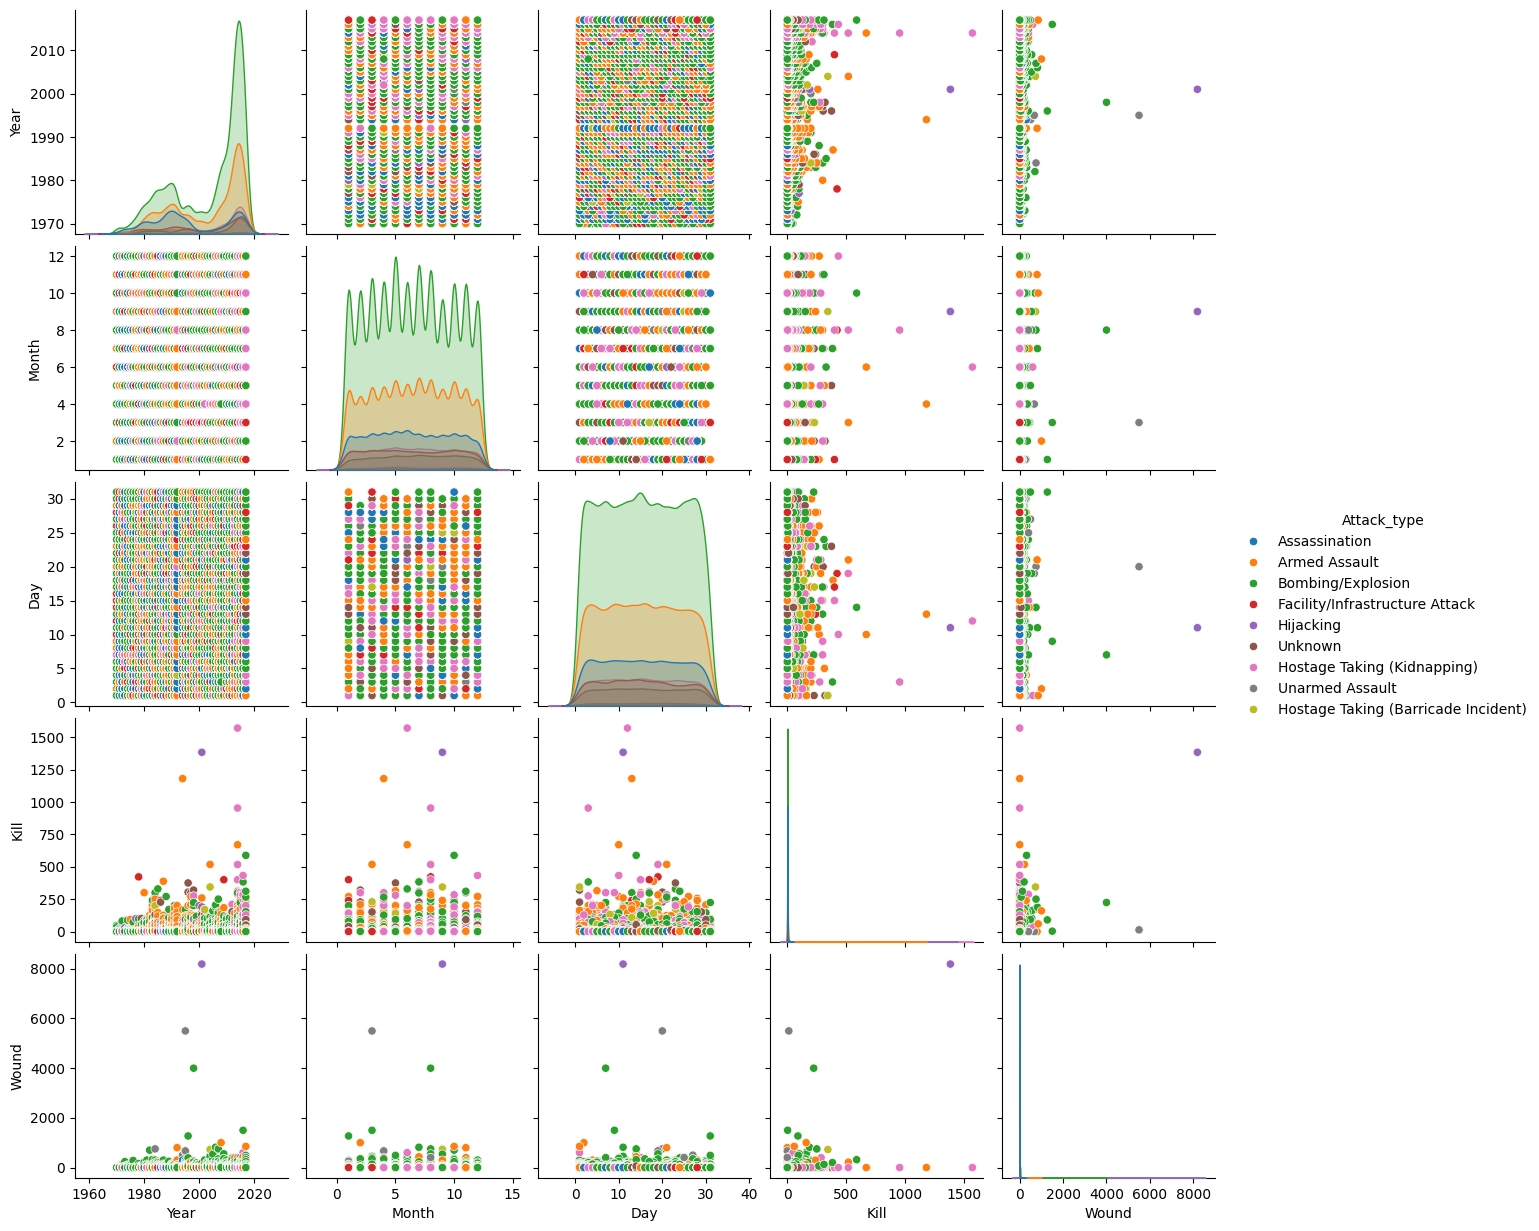

In [35]:
sns.pairplot(df,hue='Attack_type')

In [36]:
df['Region'].unique()

array(['Central America & Caribbean', 'North America', 'South America',
       'Western Europe', 'Eastern Europe', 'Sub-Saharan Africa',
       'Southeast Asia', 'Middle East & North Africa', 'East Asia',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [37]:
df['Attack_type'].nunique()

9

In [38]:
df['Attack_type'].unique()

array(['Assassination', 'Armed Assault', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking', 'Unknown',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [39]:
df['Target_type'].nunique()

22

In [40]:
df['Target_type'].unique()

array(['Private Citizens & Property', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Government (Diplomatic)', 'Religious Figures/Institutions',
       'Unknown', 'Transportation', 'Tourists', 'Journalists & Media',
       'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [41]:
df['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [42]:
top_10_countries = df['Country'].value_counts().reset_index().iloc[:10]

In [43]:
!unzip ne_110m_admin_0_countries.zip -d ne_110m_admin_0_countries

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries/ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries/ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries/ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries/ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries/ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_countries/ne_110m_admin_0_countries.shx  


In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world shapefile
world = gpd.read_file("/content/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shx")

print(world.columns)


# Merge world map with our data
world = world.merge(df, how='left', left_on='ADMIN', right_on='Country')

print(world['Region'].isnull().sum())

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
18


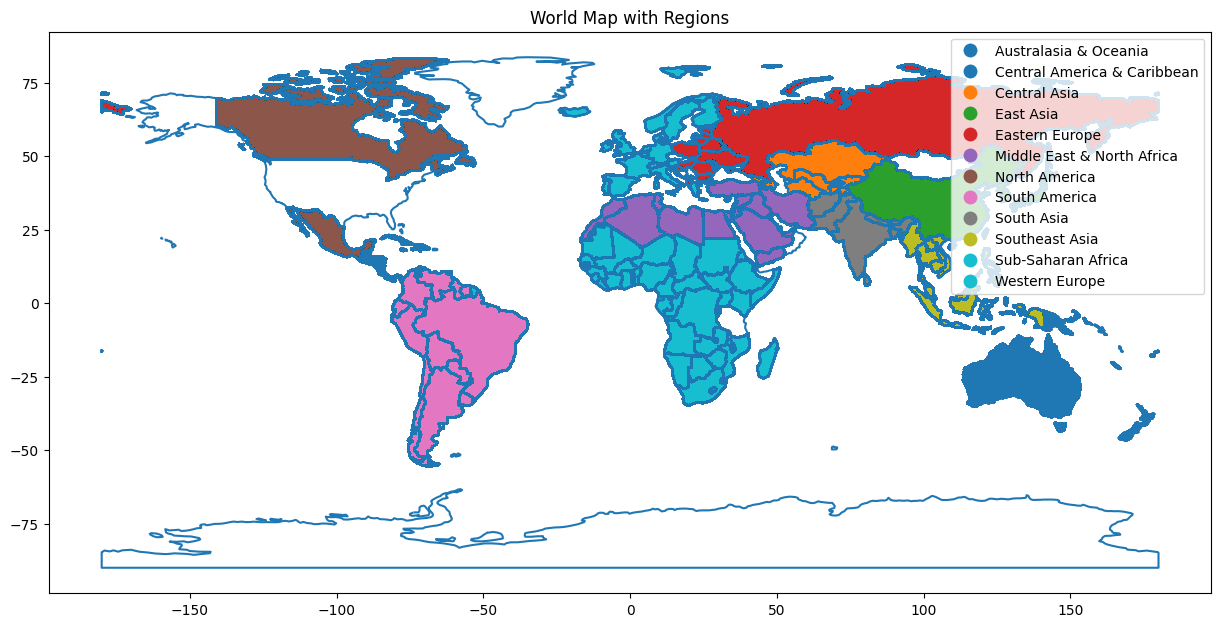

In [45]:
# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Region', ax=ax, legend=True)
plt.title('World Map with Regions')
plt.show()

In [46]:
top_10_countries = df['Country'].value_counts().reset_index().iloc[:10]
top_10_countries

,Country,count
0,Iraq,24616
1,Pakistan,14331
2,Afghanistan,12718
3,India,11931
4,Colombia,8232
5,Philippines,6874
6,Peru,6059
7,El Salvador,5277
8,United Kingdom,5208
9,Turkey,4267


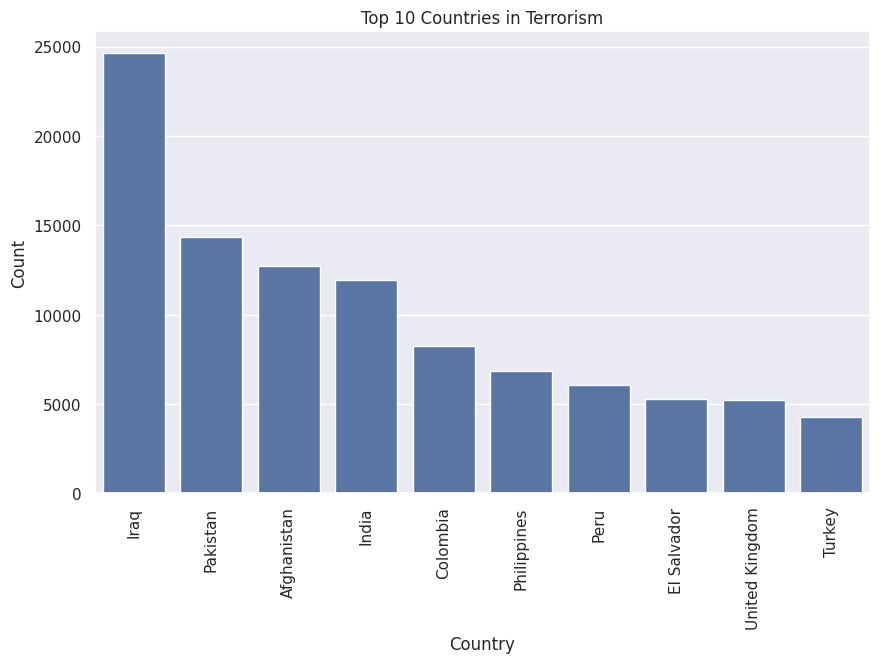

In [47]:
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.barplot(x='Country', y='count', data=top_10_countries)

# Adding title and labels
plt.title('Top 10 Countries in Terrorism')

plt.xticks(rotation=90)

plt.xlabel('Country')
plt.ylabel('Count')

# Show the plot
plt.show()

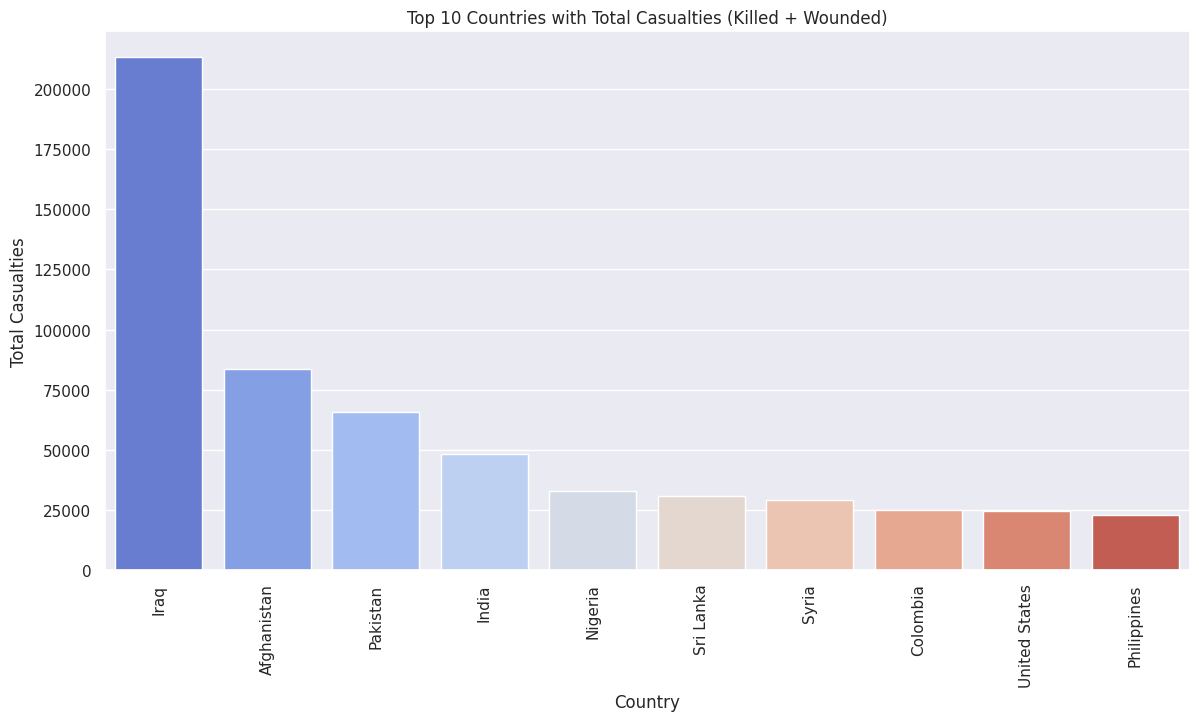

In [48]:
grouped_data = df.groupby('Country')[['Kill', 'Wound']].sum().reset_index()
grouped_data['total_casualties'] = grouped_data['Kill'] + grouped_data['Wound']
grouped_data = grouped_data.sort_values(by='total_casualties', ascending=False)

top_10_countries = grouped_data.head(10)

plt.figure(figsize=(14,7))
sns.barplot(x='Country', y='total_casualties', data=top_10_countries, palette='coolwarm')

plt.xticks(rotation=90)
plt.title('Top 10 Countries with Total Casualties (Killed + Wounded)')
plt.xlabel('Country')
plt.ylabel('Total Casualties')

plt.show()

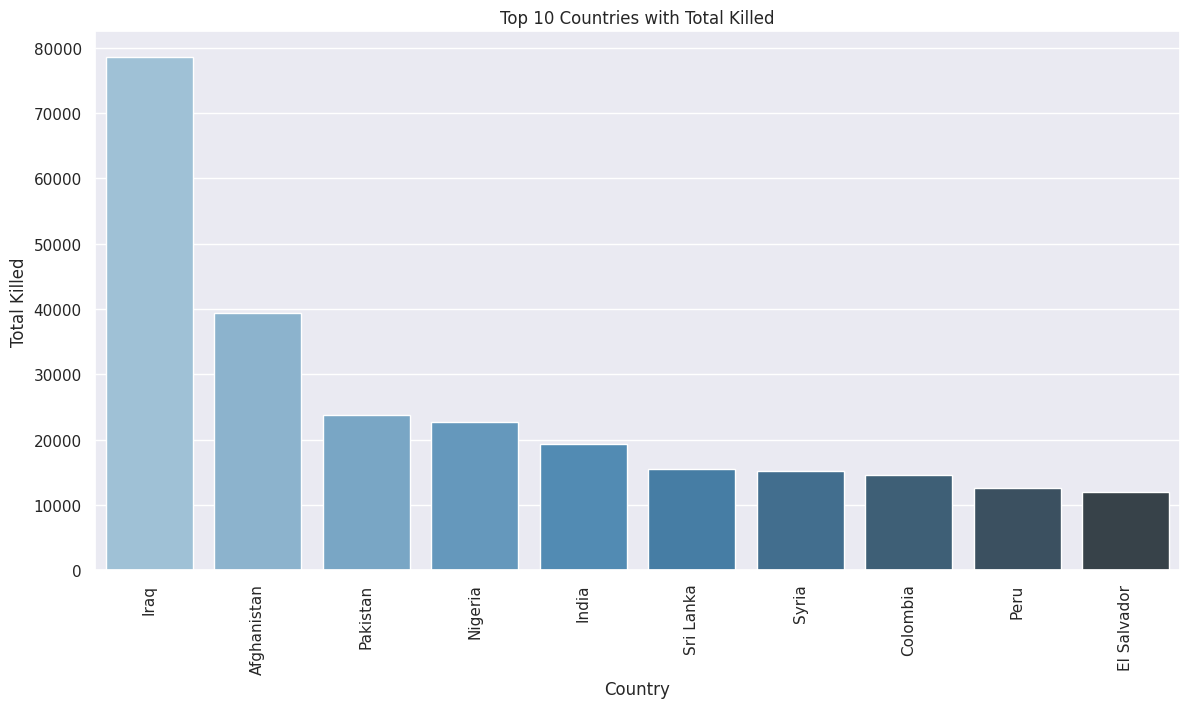

In [49]:
grouped_data = df.groupby('Country')['Kill'].sum().reset_index()

grouped_data = grouped_data.sort_values(by='Kill', ascending=False)

top_10_countries = grouped_data.head(10)

plt.figure(figsize=(14,7))
sns.barplot(x='Country', y='Kill', data=top_10_countries, palette='Blues_d')

plt.xticks(rotation=90)
plt.title('Top 10 Countries with Total Killed')
plt.xlabel('Country')
plt.ylabel('Total Killed')
plt.show()

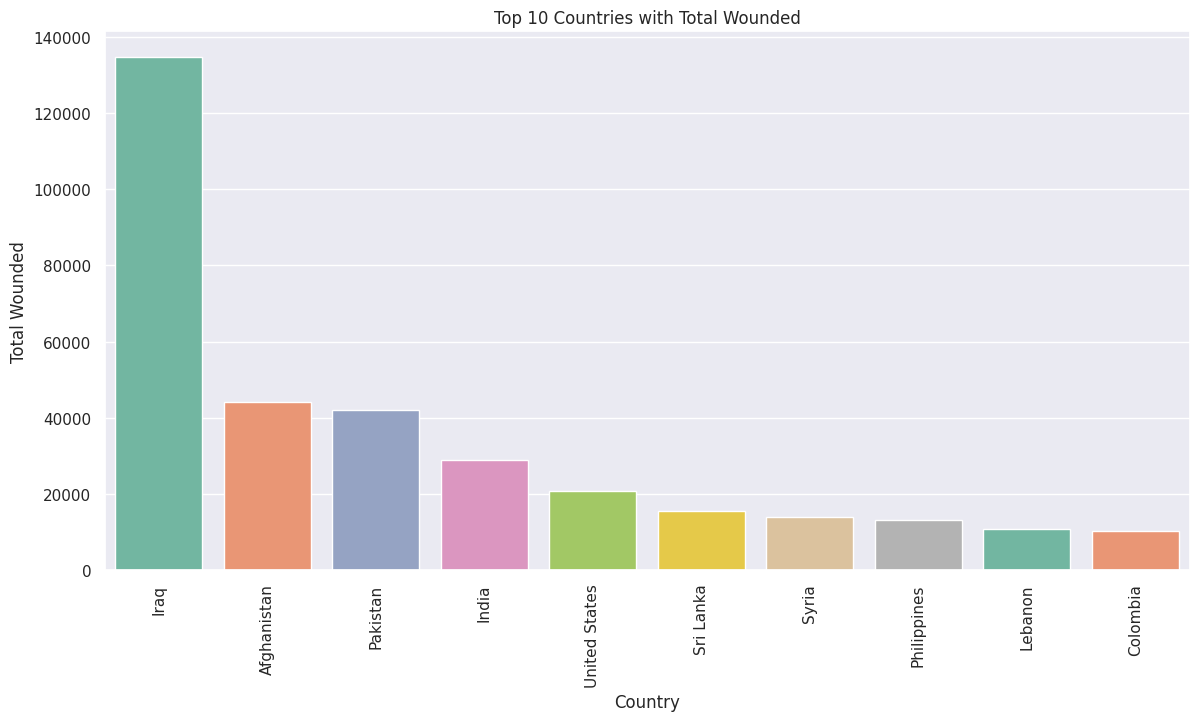

In [50]:
grouped_data = df.groupby('Country')['Wound'].sum().reset_index()
grouped_data = grouped_data.sort_values(by='Wound', ascending=False)

top_10_countries = grouped_data.head(10)

plt.figure(figsize=(14,7))
sns.barplot(x='Country', y='Wound', data=top_10_countries, palette='Set2')

plt.xticks(rotation=90)

plt.title('Top 10 Countries with Total Wounded')
plt.xlabel('Country')
plt.ylabel('Total Wounded')
plt.show()

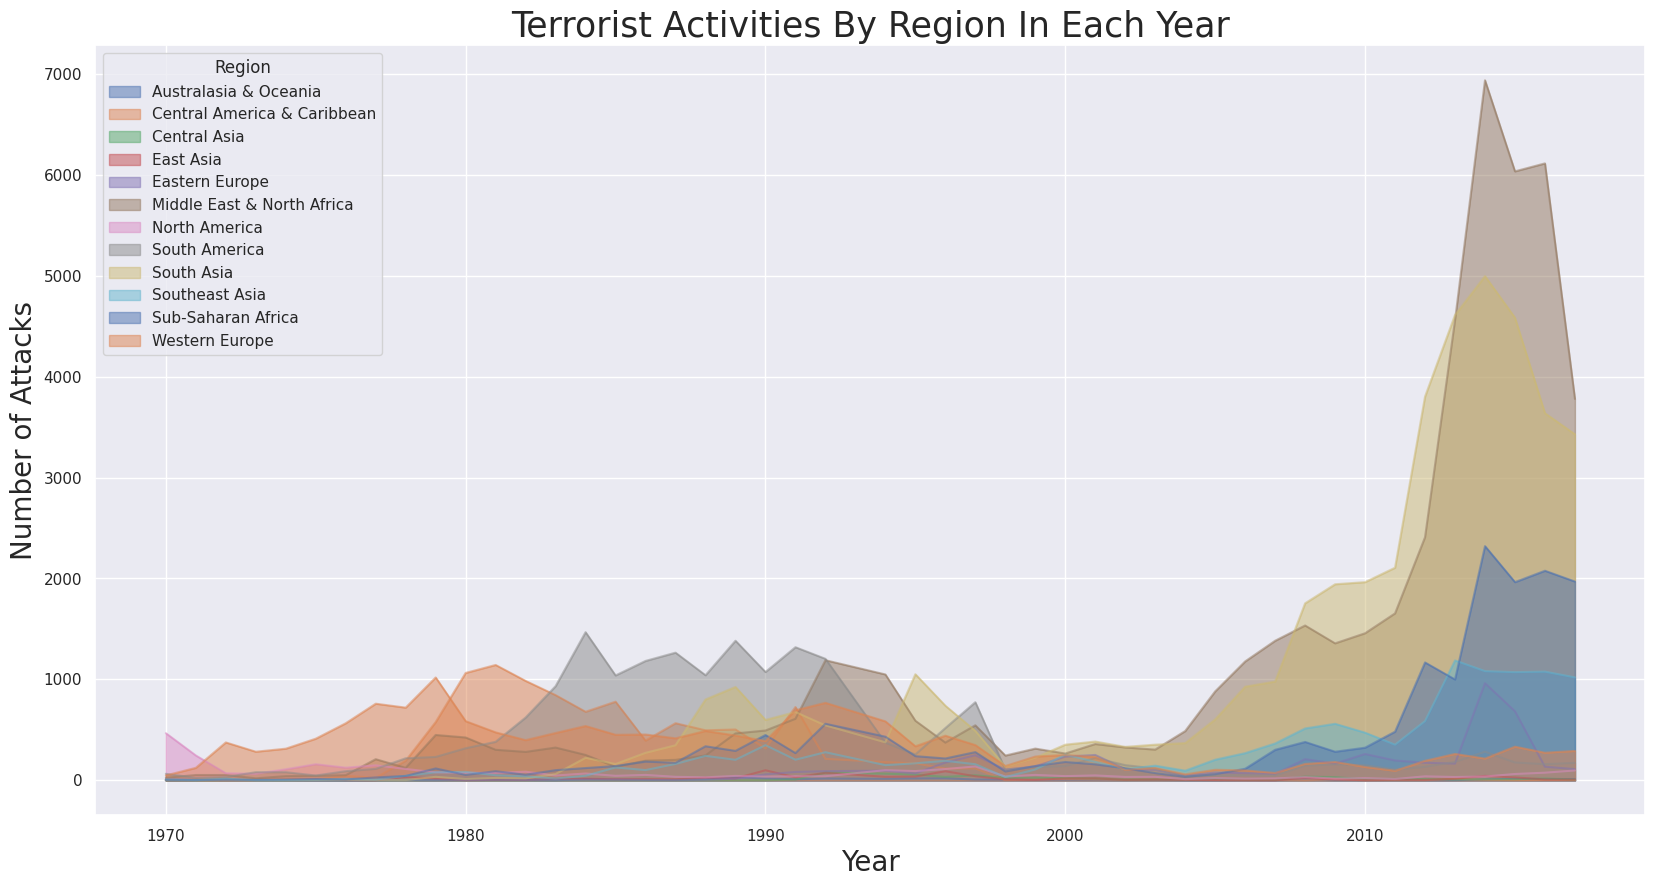

In [51]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [52]:
top_5_region = df['Region'].value_counts().reset_index().iloc[:5]

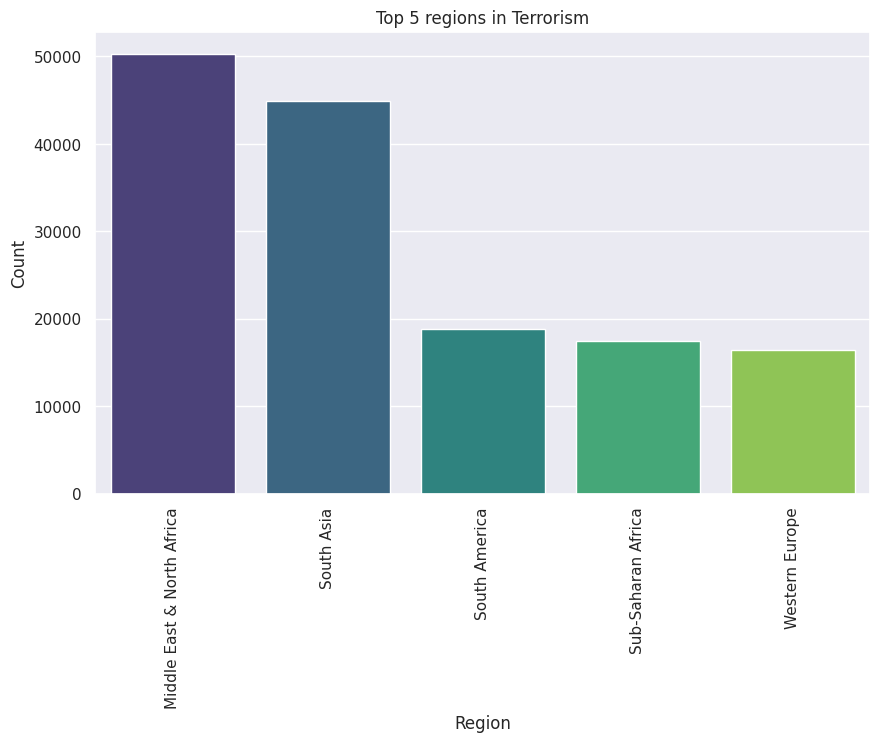

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='count', data=top_5_region, palette='viridis')

plt.title('Top 5 regions in Terrorism')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [54]:
top_5_attacktype = df['Attack_type'].value_counts().reset_index().iloc[:5]

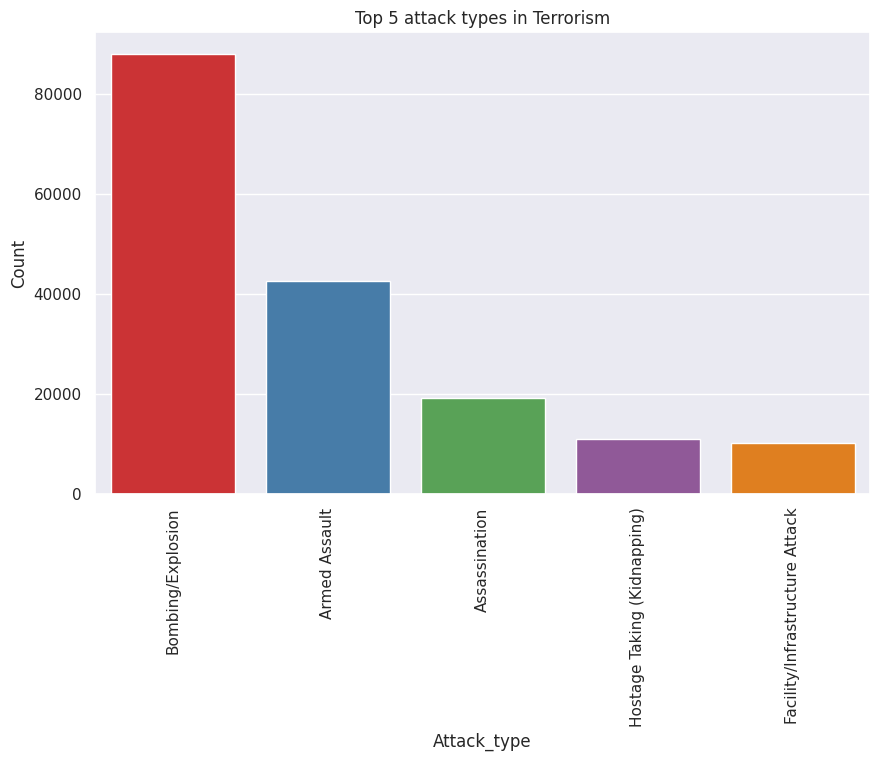

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Attack_type', y='count', data=top_5_attacktype, palette='Set1')
sns.set(style = 'darkgrid')

plt.title('Top 5 attack types in Terrorism')
plt.xticks(rotation=90)
plt.xlabel('Attack_type')
plt.ylabel('Count')

plt.show()

In [56]:
top_5_targettype = df['Target_type'].value_counts().reset_index().iloc[:5]

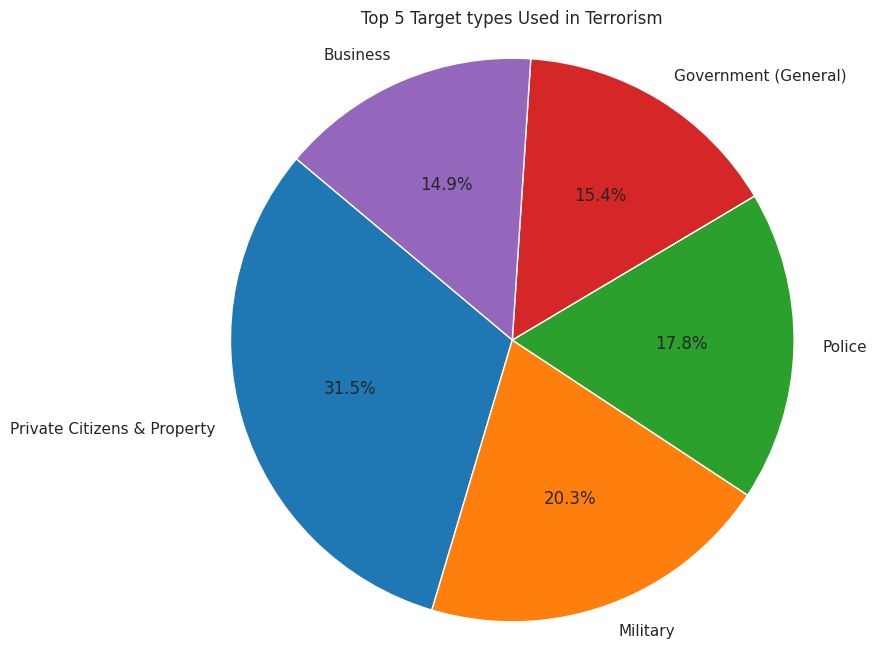

In [57]:
plt.figure(figsize=(8, 8))

colors = sns.color_palette("tab10", n_colors=len(top_5_targettype))
plt.pie(top_5_targettype['count'], labels=top_5_targettype['Target_type'], autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Top 5 Target types Used in Terrorism')
plt.axis('equal')
plt.show()

In [58]:
top_11_targetsubtype = df['Target_subtype'].value_counts().reset_index()
top_11_targetsubtype = top_11_targetsubtype[top_11_targetsubtype['Target_subtype'] != 'others']
top_11_targetsubtype = top_11_targetsubtype.iloc[:11]
top_11_targetsubtype

,Target_subtype,count
0,Unnamed Civilian/Unspecified,11516
1,Police Security Forces/Officers,11158
3,Military Unit/Patrol/Convoy,8255
4,"Military Personnel (soldiers, troops, officers...",7938
5,"Government Personnel (excluding police, military)",6588
6,Village/City/Town/Suburb,6513
7,Politician or Political Party Movement/Meeting...,6267
8,"Police Building (headquarters, station, school)",5882
9,Military Barracks/Base/Headquarters/Checkpost,5200
10,Police Patrol (including vehicles and convoys),5098


In [59]:
#taking away Unnamed civilian

top_10_targetsubtype = top_11_targetsubtype[top_11_targetsubtype['Target_subtype'] != 'Unnamed Civilian/Unspecified']
top_10_targetsubtype

,Target_subtype,count
1,Police Security Forces/Officers,11158
3,Military Unit/Patrol/Convoy,8255
4,"Military Personnel (soldiers, troops, officers...",7938
5,"Government Personnel (excluding police, military)",6588
6,Village/City/Town/Suburb,6513
7,Politician or Political Party Movement/Meeting...,6267
8,"Police Building (headquarters, station, school)",5882
9,Military Barracks/Base/Headquarters/Checkpost,5200
10,Police Patrol (including vehicles and convoys),5098
11,Government Building/Facility/Office,4767


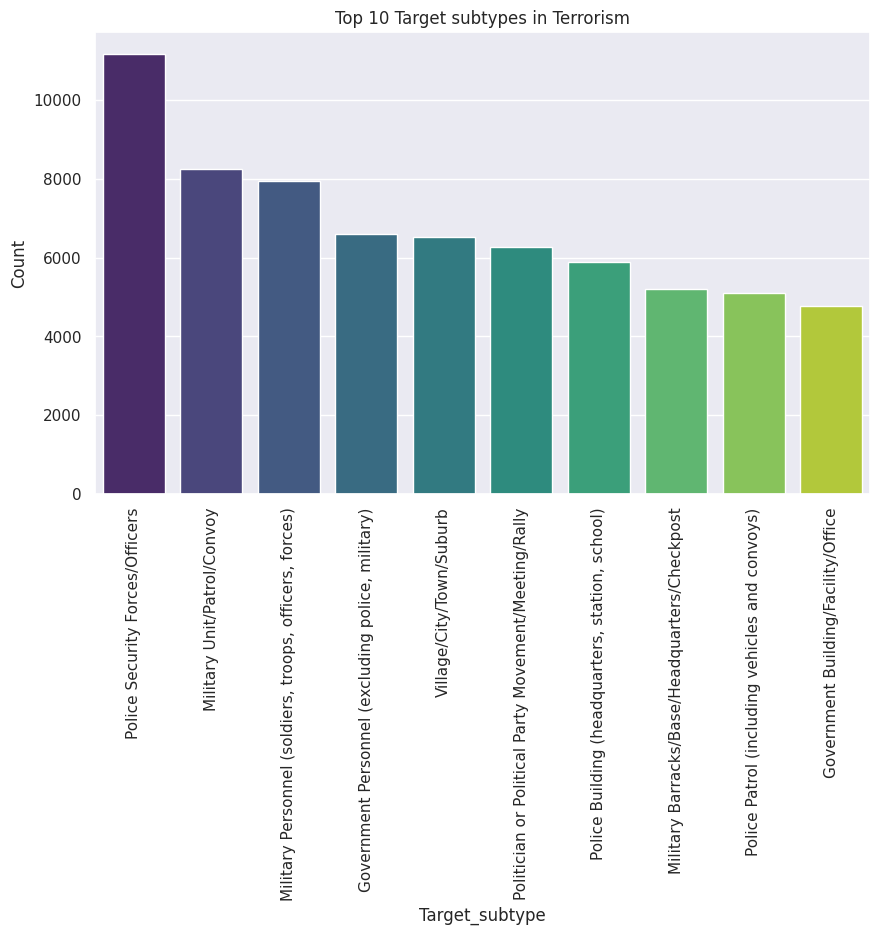

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Target_subtype', y='count', data=top_10_targetsubtype, palette='viridis')
sns.set(style = 'darkgrid')

plt.title('Top 10 Target subtypes in Terrorism')
plt.xticks(rotation=90)
plt.xlabel('Target_subtype')
plt.ylabel('Count')
plt.show()

In [61]:
top_6_gangname = df['Gang_name'].value_counts().reset_index().iloc[:6]
top_6_gangname

,Gang_name,count
0,Unknown,82457
1,Taliban,7469
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4532
4,Farabundo Marti National Liberation Front (FMLN),3343
5,Al-Shabaab,3281


In [62]:
#lets remove unknown from the plot, since its not relevant

top_5_gangname =top_6_gangname[top_6_gangname['Gang_name'] != 'Unknown']
top_5_gangname

,Gang_name,count
1,Taliban,7469
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4532
4,Farabundo Marti National Liberation Front (FMLN),3343
5,Al-Shabaab,3281


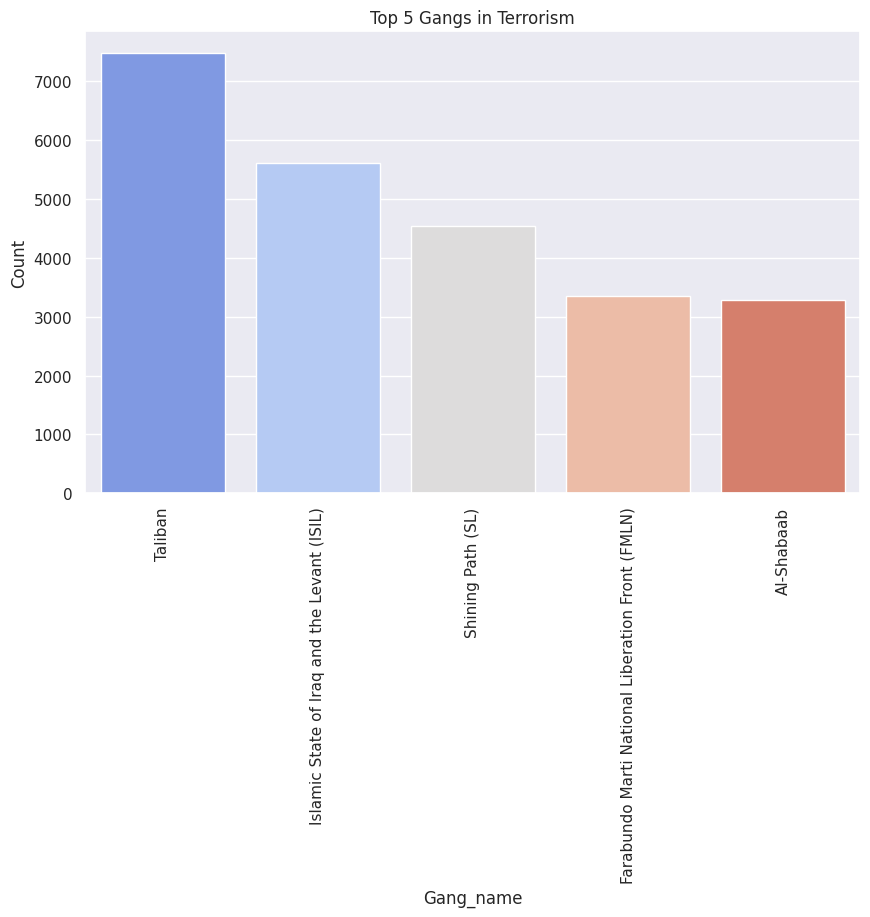

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gang_name', y='count', data=top_5_gangname, palette='coolwarm')

plt.title('Top 5 Gangs in Terrorism')
plt.xticks(rotation=90)
plt.xlabel('Gang_name')
plt.ylabel('Count')
plt.show()

In [64]:
top_6_weapontype = df['Weapon_type'].value_counts().reset_index().iloc[:6]
top_6_weapontype

,Weapon_type,count
0,Explosives,92099
1,Firearms,58347
2,Unknown,14890
3,Incendiary,11058
4,Melee,3624
5,Chemical,319


In [65]:
top_5_weapontype = top_6_weapontype[top_6_weapontype['Weapon_type'] != 'Unknown']
top_5_weapontype

,Weapon_type,count
0,Explosives,92099
1,Firearms,58347
3,Incendiary,11058
4,Melee,3624
5,Chemical,319


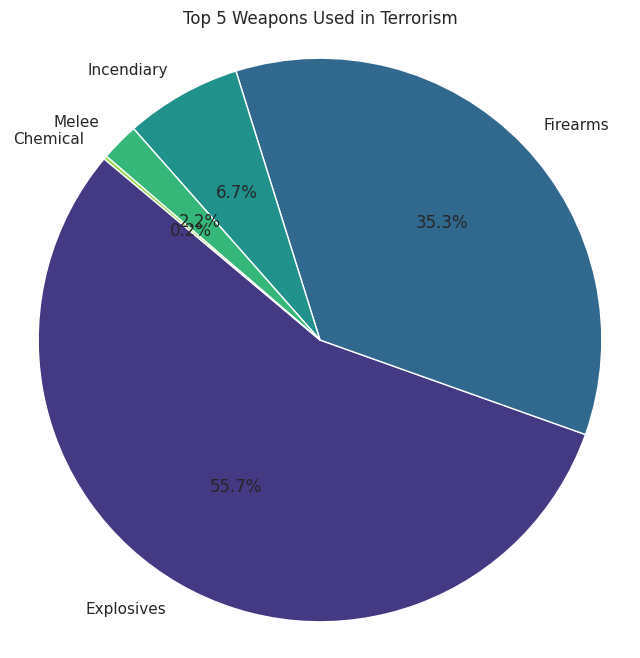

In [66]:
'''
plt.figure(figsize=(10, 6))
sns.barplot(x='Weapon_type', y='count', data=top_5_weapontype, palette='viridis')

plt.title('Top 5 Weapons used in Terrorism')
plt.xticks(rotation=90)

plt.xlabel('Weapon_type')
plt.ylabel('count')
plt.show()
'''

plt.figure(figsize=(8, 8))

colors = sns.color_palette("viridis", n_colors=len(top_5_weapontype))
plt.pie(top_5_weapontype['count'], labels=top_5_weapontype['Weapon_type'], autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Top 5 Weapons Used in Terrorism')

plt.axis('equal')
plt.show()

So there are 204 countries recorded as 1 record is for other countries.

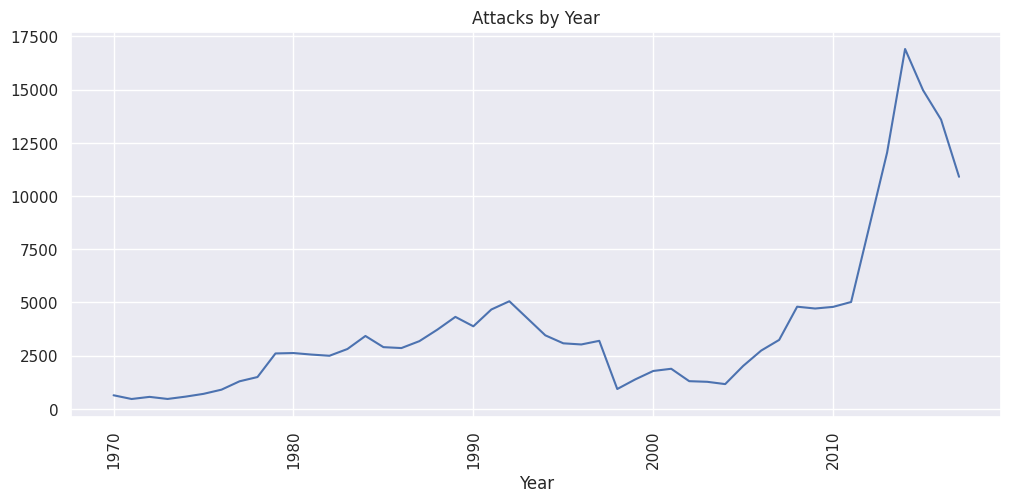

In [67]:
attacks_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12,5))

sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values)

plt.xticks(rotation=90)
plt.title('Attacks by Year')
plt.show()

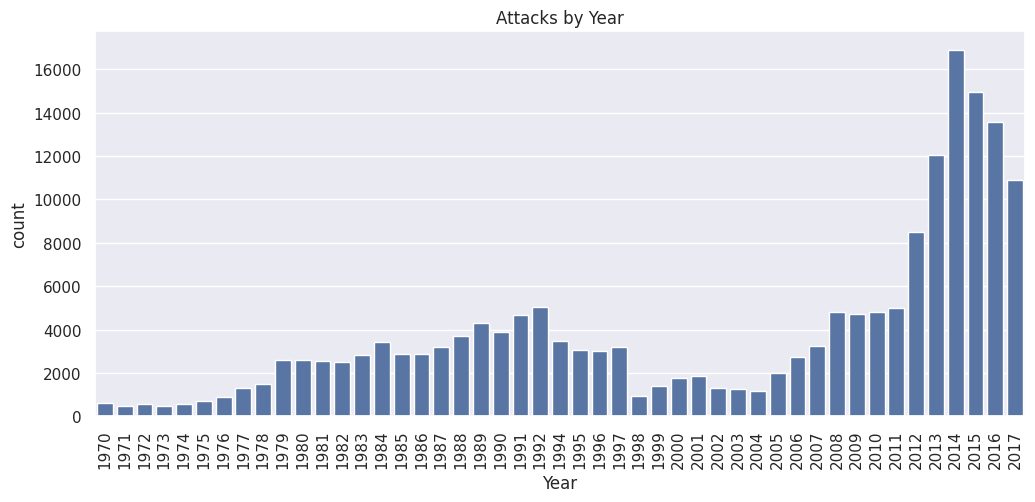

In [68]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.title('Attacks by Year')
sns.countplot(x=df.Year)
sns.set(style = 'darkgrid')


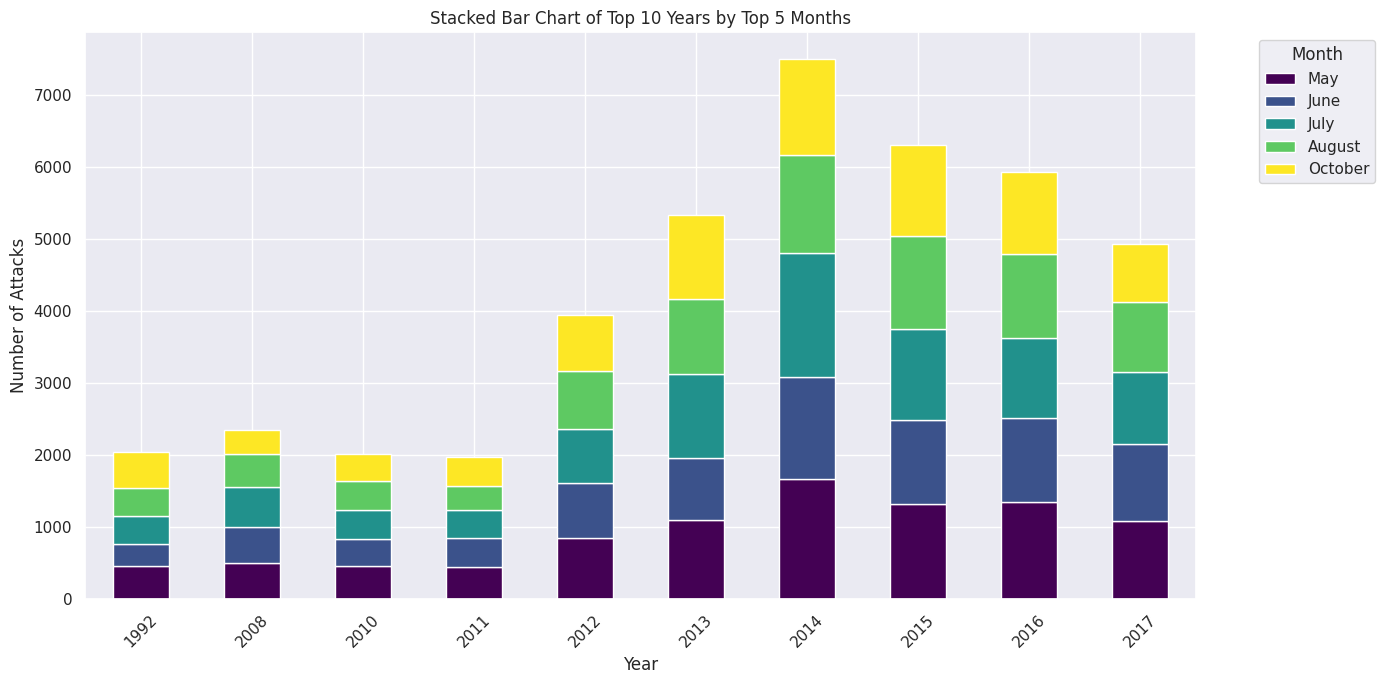

In [71]:
top_10_years = df['Year'].value_counts().nlargest(10).index
top_5_months = df['Month'].value_counts().nlargest(5).index

filtered_df = df[df['Year'].isin(top_10_years) & df['Month'].isin(top_5_months)]
grouped_data = filtered_df.groupby(['Year', 'Month']).size().reset_index(name='Count')

pivot_data = grouped_data.pivot(index='Year', columns='Month', values='Count').fillna(0)

month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

pivot_data.columns = [month_names[int(month) - 1] for month in pivot_data.columns]

plt.figure(figsize=(14, 7))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

plt.title('Stacked Bar Chart of Top 10 Years by Top 5 Months')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

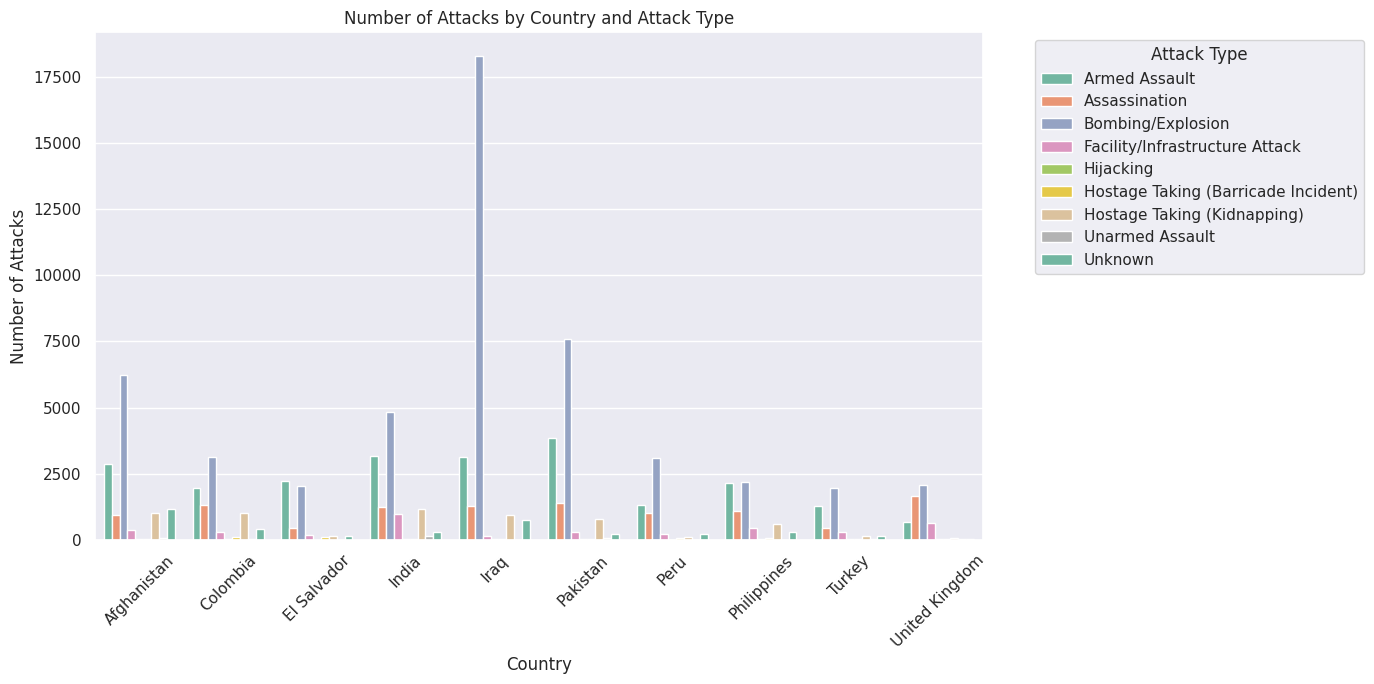

In [79]:
top_10_countries = df['Country'].value_counts().nlargest(10).index

filtered_df = df[df['Country'].isin(top_10_countries)]
grouped_data = filtered_df.groupby(['Country', 'Attack_type']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Count', hue='Attack_type', data=grouped_data, palette='Set2')

plt.xticks(rotation=45)
plt.title('Number of Attacks by Country and Attack Type')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')

plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

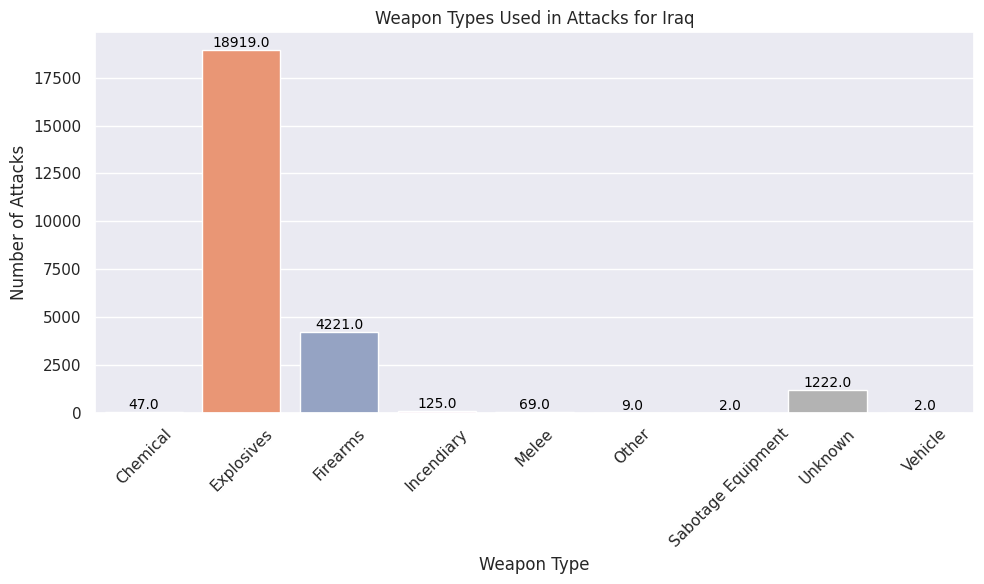

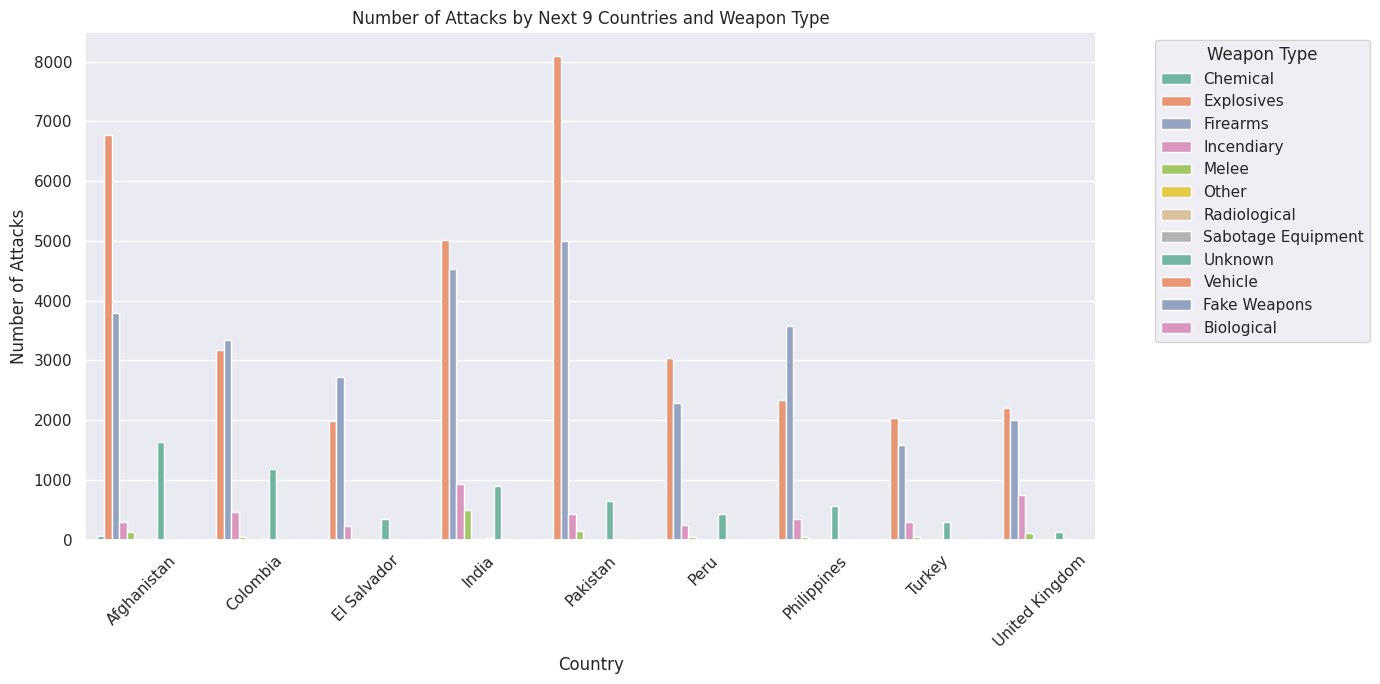

In [73]:
highest_country = df['Country'].value_counts().idxmax()
highest_country_data = df[df['Country'] == highest_country]

highest_country_grouped = highest_country_data.groupby('Weapon_type').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Weapon_type', y='Count', data=highest_country_grouped, palette='Set2')

plt.title(f'Weapon Types Used in Attacks for {highest_country}')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Attacks')

plt.xticks(rotation=45)

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black')

plt.tight_layout()
plt.show()


next_9_countries = df['Country'].value_counts().nlargest(10).index[1:]  # Exclude the first highest

filtered_df_next_9 = df[df['Country'].isin(next_9_countries)]

grouped_data_next_9 = filtered_df_next_9.groupby(['Country', 'Weapon_type']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Count', hue='Weapon_type', data=grouped_data_next_9, palette='Set2')

plt.xticks(rotation=45)
plt.title('Number of Attacks by Next 9 Countries and Weapon Type')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')

plt.legend(title='Weapon Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

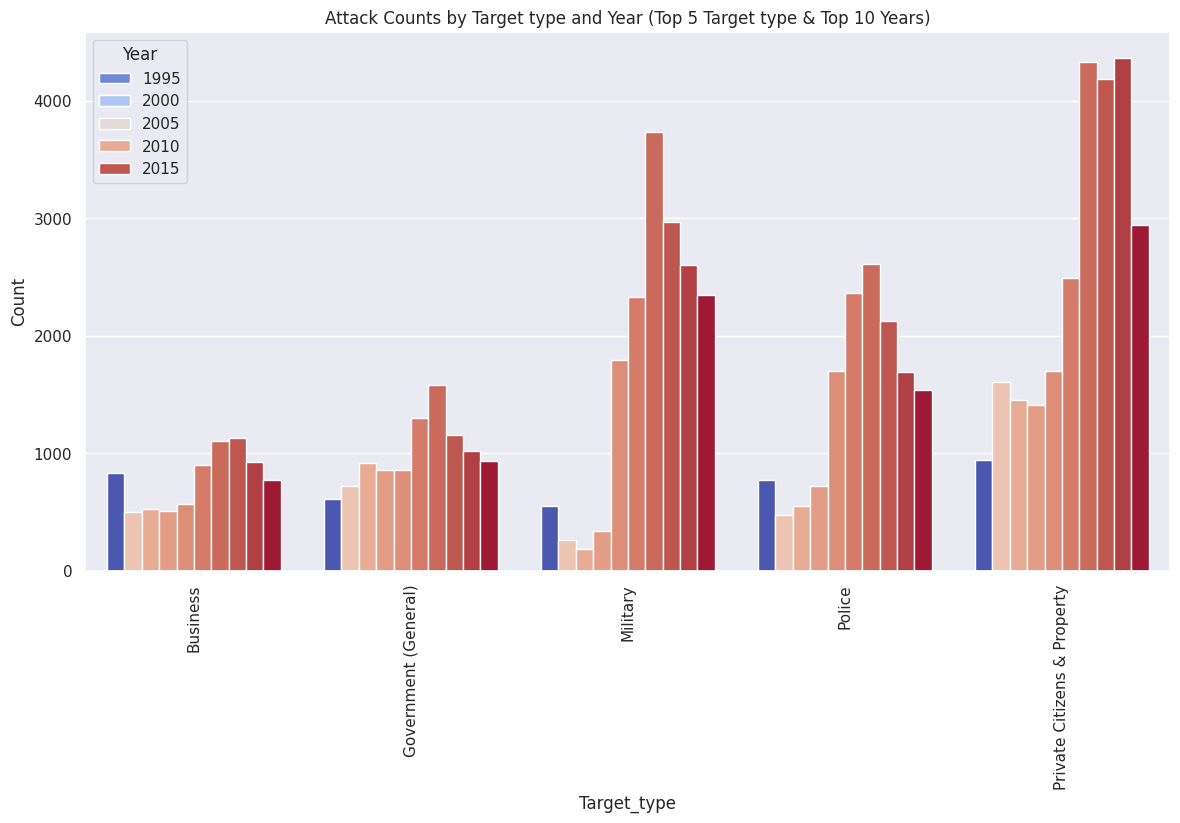

In [74]:
top_5_targettype = df['Target_type'].value_counts().index[:5]

top_10_years = df['Year'].value_counts().index[:10]

new_df = df[df['Target_type'].isin(top_5_targettype) & df['Year'].isin(top_10_years)]

plt.figure(figsize=(14,7))

grouped_data = new_df.groupby(['Target_type', 'Year']).size().reset_index(name='Count')

sns.barplot(x='Target_type', y='Count', hue='Year', data=grouped_data, palette='coolwarm')

plt.xticks(rotation=90)
plt.title('Attack Counts by Target type and Year (Top 5 Target type & Top 10 Years)')
plt.show()

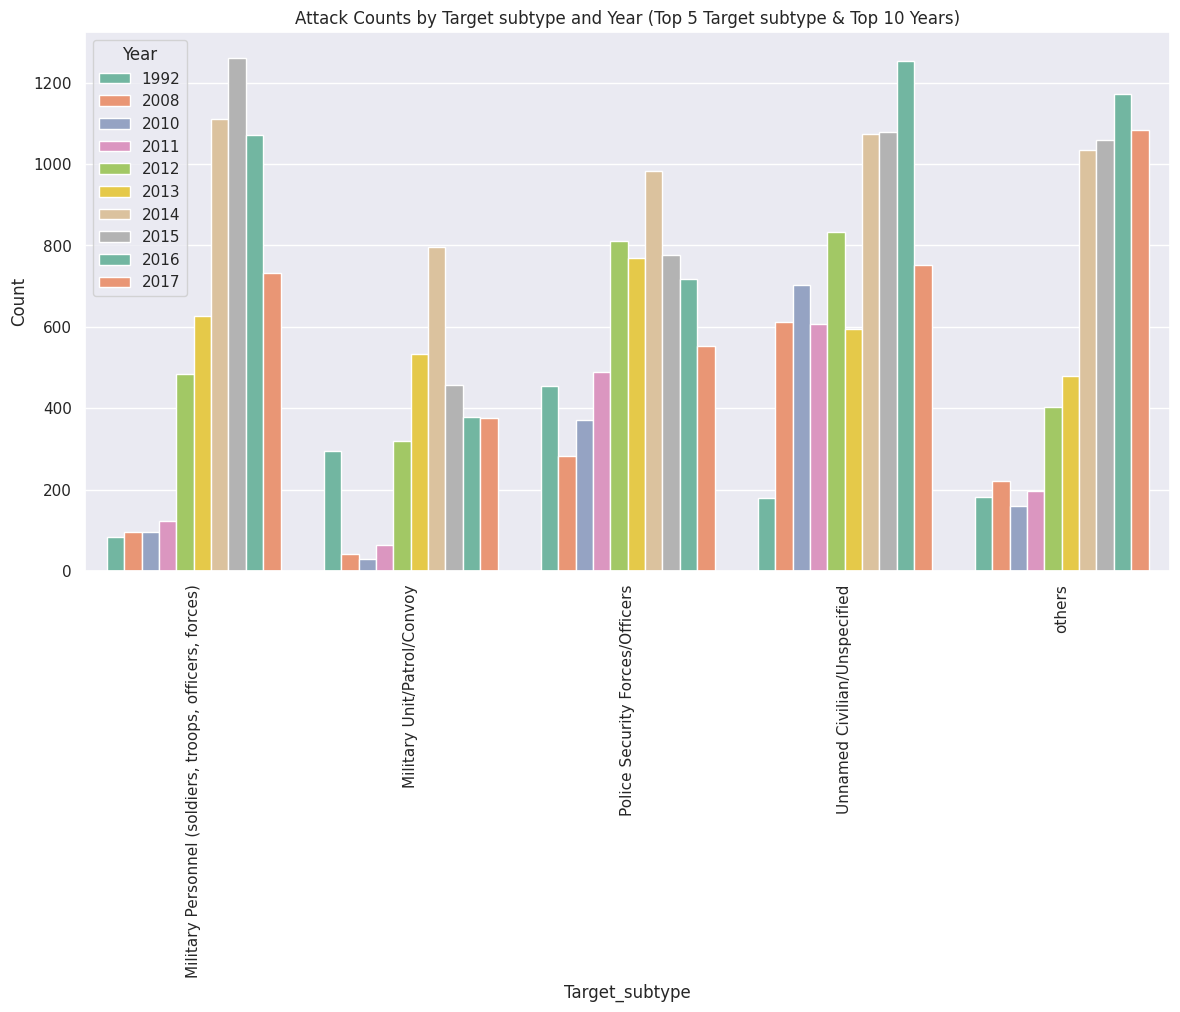

In [75]:
top_5_targetsubtype = df['Target_subtype'].value_counts().index[:5]

top_10_years = df['Year'].value_counts().index[:10]

new_df = df[df['Target_subtype'].isin(top_5_targetsubtype) & df['Year'].isin(top_10_years)]

plt.figure(figsize=(14,7))

grouped_data = new_df.groupby(['Target_subtype', 'Year']).size().reset_index(name='Count')

sns.barplot(x='Target_subtype', y='Count', hue='Year', data=grouped_data, palette = 'Set2')

plt.xticks(rotation=90)
plt.title('Attack Counts by Target subtype and Year (Top 5 Target subtype & Top 10 Years)')
plt.show()

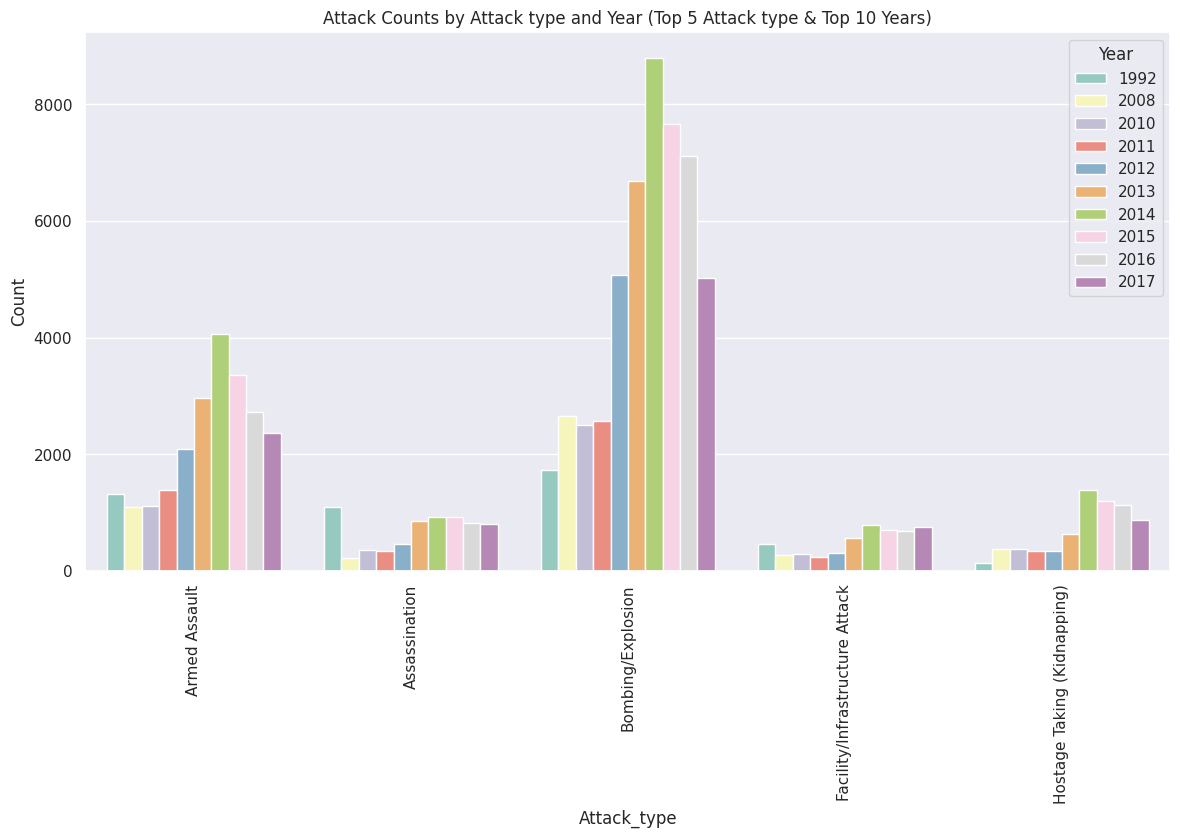

In [77]:
top_5_attacktype = df['Attack_type'].value_counts().index[:5]

top_10_years = df['Year'].value_counts().index[:10]

new_df = df[df['Attack_type'].isin(top_5_attacktype) & df['Year'].isin(top_10_years)]

plt.figure(figsize=(14,7))

grouped_data = new_df.groupby(['Attack_type', 'Year']).size().reset_index(name='Count')

sns.barplot(x='Attack_type', y='Count', hue='Year', data=grouped_data, palette = 'Set3')

plt.xticks(rotation=90)
plt.title('Attack Counts by Attack type and Year (Top 5 Attack type & Top 10 Years)')
plt.show()

In [107]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type', 'Kill', 'Wound', 'Success'],
      dtype='object')

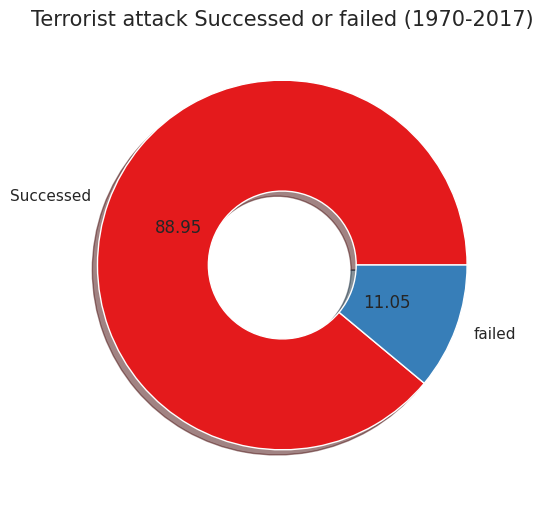

In [109]:
v = df['Success'].value_counts()
fig = plt.gcf()
fig.set_size_inches((10,6))

cmap = plt.get_cmap('Set1')
color = cmap(np.arange(len(v)))
plt.pie(v, labels = ['Successed', 'failed'], autopct = '%0.02f', colors = color,
        labeldistance = 1.1, wedgeprops= dict(width = 0.6), shadow = True)
plt.title('Terrorist attack Successed or failed (1970-2017)', fontsize = (15))
plt.show()

In [115]:
india = df[df['Country'] == 'India']
india.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Kill,Wound,Success
1186,1972,2,22,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Palestinians,Explosives,0,0,1
2764,1975,1,2,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),"Government Personnel (excluding police, military)",Ananda Marga,Explosives,4,0,1
3857,1976,5,26,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,Airport,Unknown,Explosives,0,0,1
5327,1977,9,28,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Japanese Red Army (JRA),Firearms,0,0,1
7337,1979,1,13,India,South Asia,Assam,Unknown,Armed Assault,Police,Police Patrol (including vehicles and convoys),Naga People,Firearms,0,0,1


In [123]:
india['State'].value_counts().nlargest(10)

,count
State,
Jammu and Kashmir,2449
Assam,1149
Manipur,1100
Chhattisgarh,977
Punjab,945
Jharkhand,885
Bihar,686
West Bengal,646
Odisha,426


In [125]:
print('In India, high number of killed victims in one attack',india['Kill'].value_counts().nlargest(5))
print('In India, high number of wounded victims in one attack',india['Wound'].value_counts().nlargest(5))

In India, high number of killed victims in one attack Kill
0    6611
1    2610
2     827
3     437
4     318
Name: count, dtype: int64
In India, high number of wounded victims in one attack Wound
0    8219
1    1066
2     599
3     382
4     234
Name: count, dtype: int64


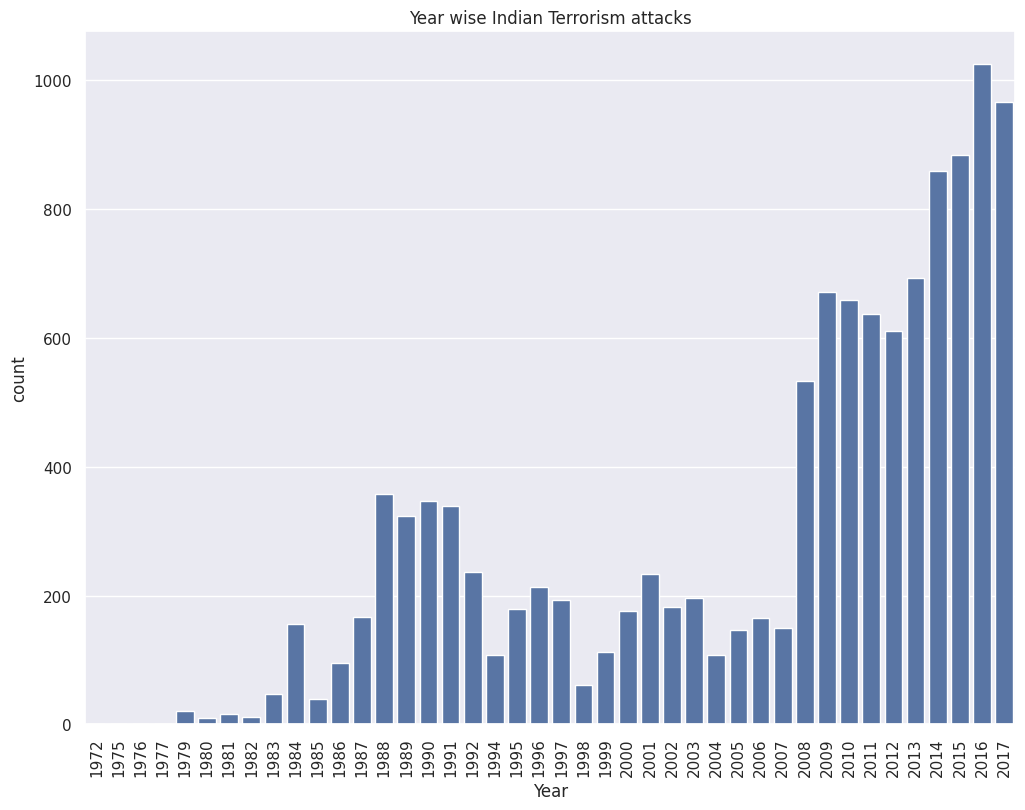

In [133]:
plt.figure(figsize=(12,9))
plt.title('Year wise Indian Terrorism attacks')
plt.xticks(rotation=90)
sns.countplot(x=india.Year)
sns.set(style='darkgrid')

                City  count
0            Baghdad   7582
1            Karachi   2647
2               Lima   2356
3              Mosul   2263
4            Belfast   2169
...              ...    ...
36543        H'doura      1
36544    Tamarasheni      1
36545      Kororamae      1
36546  Kitgum Matidi      1
36547       Kubentog      1

[36548 rows x 2 columns]


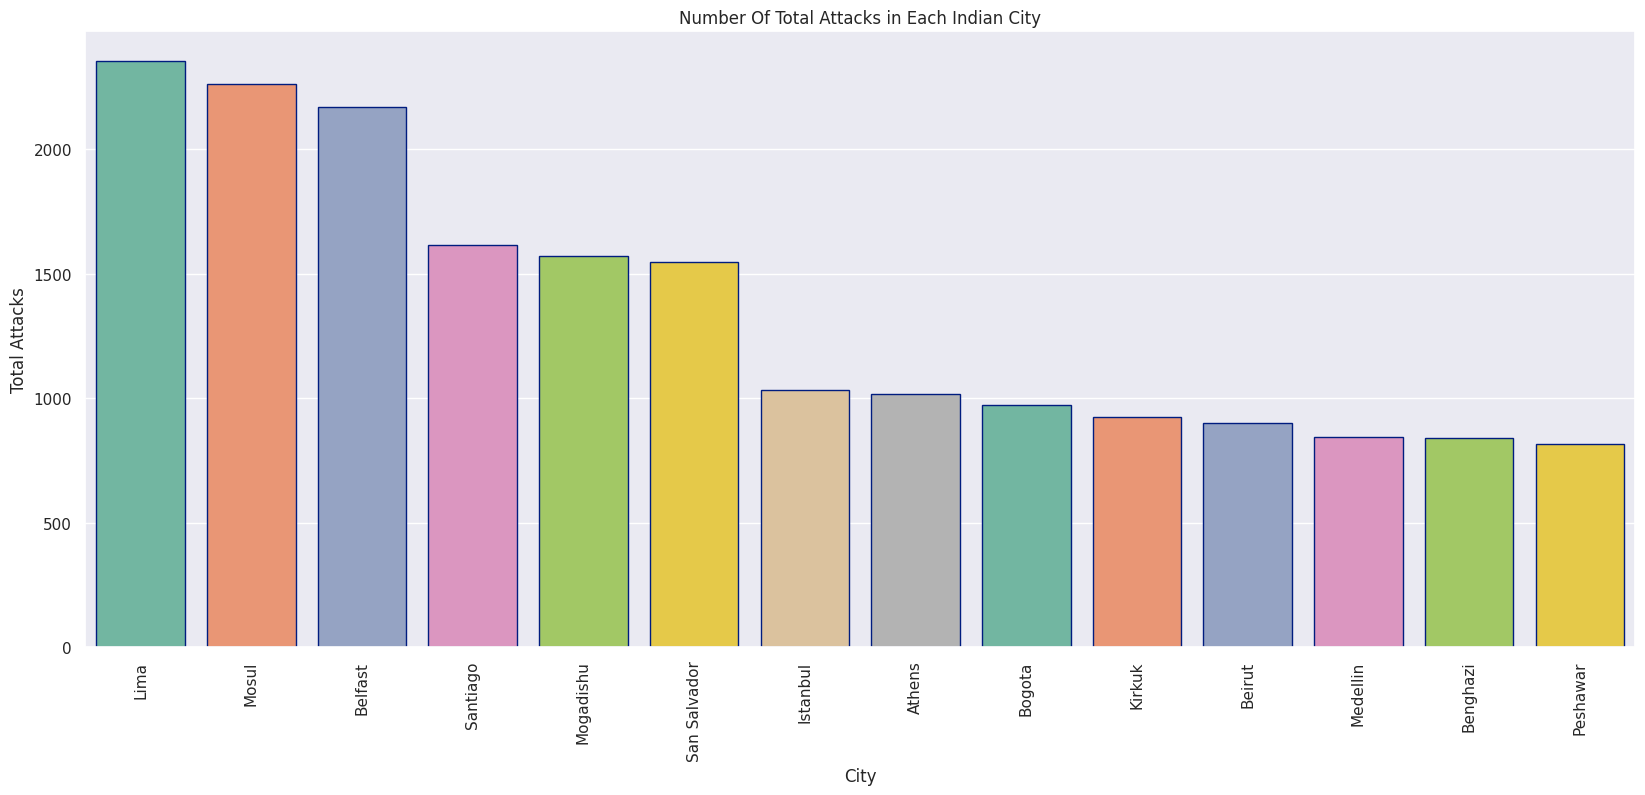

In [122]:
df_new = df[df['City'] != 'Unknown']
city_attacks_india = df_new['City'].value_counts().reset_index()

print(city_attacks_india)

city_attacks_india.columns = ['City', 'Total Attacks']

city_attacks_india.drop(1, inplace=True)

plt.subplots(figsize=(20,8))
sns.barplot(x='City', y='Total Attacks', data=city_attacks_india[1:15], palette='Set2', edgecolor=sns.color_palette('dark',10))

plt.xticks(rotation=90)
plt.title('Number Of Total Attacks in Each Indian City')
plt.show()

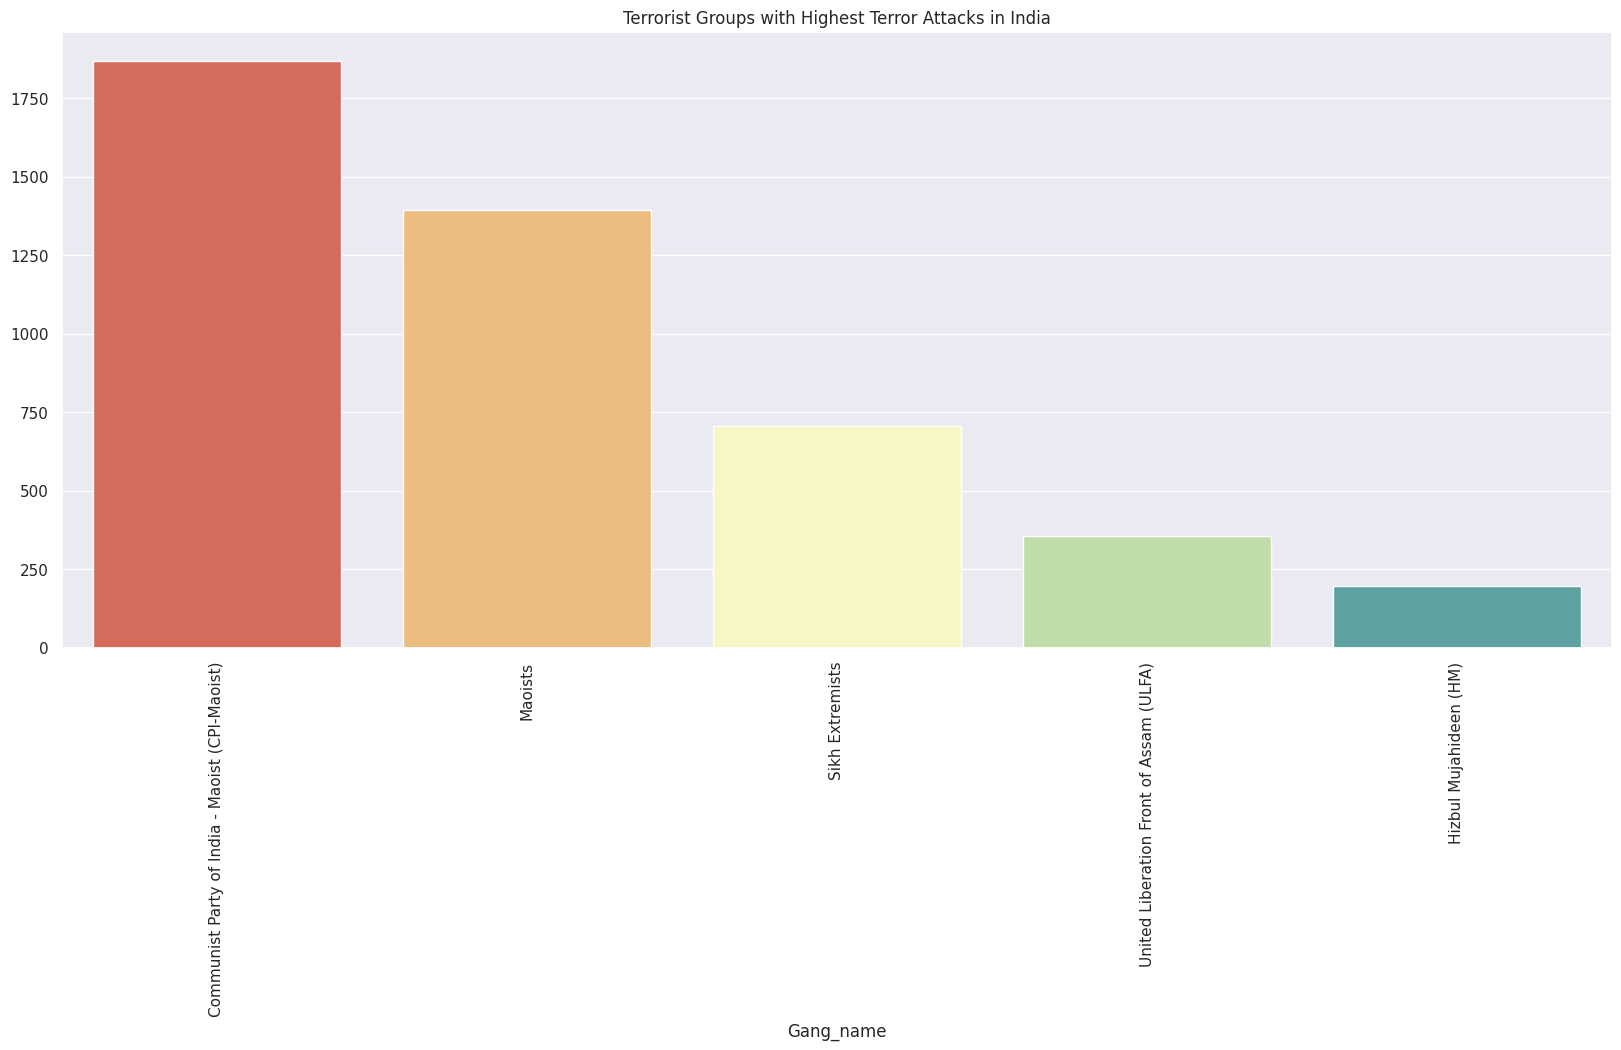

In [117]:
#since 0 is Unknown, starting from 1
sns.barplot(y = india['Gang_name'].value_counts()[1:6].values,x = india['Gang_name'].value_counts()[1:6].index,palette='Spectral')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.title('Terrorist Groups with Highest Terror Attacks in India')
plt.show()

#Conclusions

1. Total of killed persons in one terrorism act : 410657<br>
2. Total of wounded persons in one terrorism act : 523094<br>
3. Top 3 highly killed in one terrorism act: 97881, 36424, 14101<br>
4. Top 3 highly wounded in one terrorism act: 118808, 15988, 10207<br>
5. Top 3 countries with more casualties : Iraq, Afghanistan, Pakistan<br>
6. Mostly attacked region : Middle East & North Africa<br>
7. Mostly attacking type : Bombing / Explosion<br>
8. Mostly attacking Target type : Private citizens & property<br>
9. Mostly attacking Target subtype : Police security forces/officers<br>
10. Top 3 Gangs : Taliban, Islamic State of Iraq & Levant, Shining Path (SL)<br>
<br>
11. In India, Top 3 states with major attacks are Jammu and Kashmir, Assam and Manipur<br>
12. In India, Top 3 cities with major attacks are Lima, Mosul and Belfast.<br>
13. In India, Top 3 gangs with major attacks are Communists Party of India (CPI - Maoist), Maoist and Sikh Extremists.<br>
14. In India, high number of killed victims in one attack : 6611<br>
15. In India, high number of wounded victims in one attack : 8219<br>